# Input normalization testbench

In this example we define randomly pick a linear combination of the input sample signals (x) assigned to (y).

We plot the L2 error of different weight selections over a regular 2D grid of weights. 

The inputs (x) are generated from a normal distribution following addition of channel scale, bias and correlation. You can play with this generation procedure by playing with mag_scale, mag_bias and mag_corr which are the magnitude of each such effect.

## Interesting scenarios

* Only bias

## Good resources:

* Efficient BackProp - http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf
* Lecture 6.2 — A bag of tricks for mini batch gradient descent - https://www.youtube.com/watch?v=Xjtu1L7RwVM

In [137]:
# General setup and params
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

# Do not change
n_dims = 2

# Number of samples
n = 1000
mag_scale = 5.
mag_bias = 10.
mag_corr = 20.

# Random scale
x_scale = 1.0 + mag_scale * np.random.randn(n_dims, 1)

# Random bias
x_bias = mag_bias * np.random.rand(n_dims, 1)

# Random correlation
x_corr = np.eye(n_dims) + mag_corr * np.random.randn(n_dims, n_dims)

# Random function
x_W = np.random.randn(n_dims, 1)

x_seed = np.random.rand(n, n_dims)

r = 1e2
w1_ = np.linspace(-r, r, 200)
w2_ = np.linspace(-r, r, 200)

w1, w2 = np.meshgrid(w1_, w2_)
w = np.stack([w1, w2], axis=-1)

def visualize(x_in, y_in):
    E = (w.dot(x_in.T) - y_in.T)**2
    E = np.sum(E, axis=-1)/ n

    plt.imshow(np.log(E)/2, extent=[-r, r, -r, r])
    plt.show()

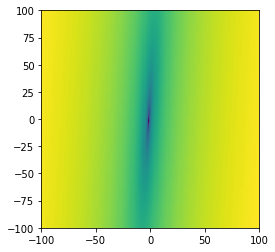

In [138]:
# Origianl input
x = np.dot(x_seed * x_scale.T, x_corr) + x_bias.T
y = x.dot(x_W)

visualize(x, y)


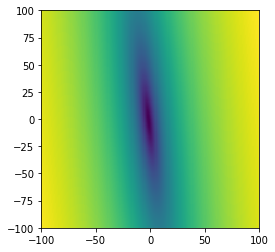

In [139]:
# Mean cancelation input

def mean_cancellation(x):
    res = x - x.mean(axis=0, keepdims=True)
    return res

x_centered = mean_cancellation(x)
visualize(x_centered, y)

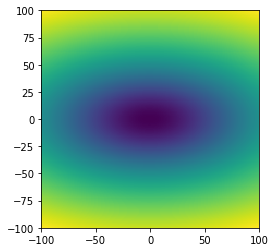

In [140]:
# Decorrelate

def decorrelate(x):
    corr = x_scaled.T.dot(x_scaled)
    ew, ev = np.linalg.eig(corr)

    x_decorr = x_scaled.dot(ev) 
    return x_decorr

x_centered = mean_cancellation(x)
x_decorr = decorrelate(x_centered)


visualize(x_decorr, y)

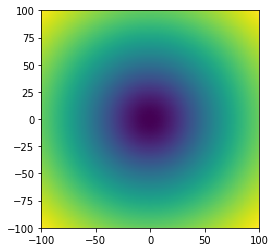

In [141]:
# Equalize convariance
def equalize(x):
    return x / x.std(axis=0)

x_centered = mean_cancellation(x)
x_decorr = decorrelate(x_centered)
x_equalized = equalize(x_decorr)

visualize(x_equalized, y)